In [ ]:
import cv2
import os
import shutil

In [ ]:
!pip install kaggle
from google.colab import files

# Upload kaggle.json
files.upload()
os.makedirs('/root/.kaggle/', exist_ok=True)

# Move kaggle.json to the .kaggle directory
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 600)
!kaggle datasets download -d ananthu017/emotion-detection-fer


Saving kaggle.json to kaggle (2).json
Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0
 81% 53.0M/65.2M [00:00<00:00, 184MB/s]
100% 65.2M/65.2M [00:00<00:00, 180MB/s]


In [ ]:
!unzip /content/emotion-detection-fer.zip


Streaming output truncated to the last 5000 lines.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    

In [ ]:
image=cv2.imread("/content/train/angry/im0.png")


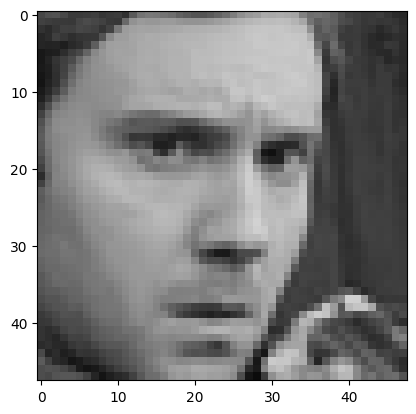

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [ ]:
dict={"angry":0,"disgusted":1,"fearful":2,"happy":3,"neutral":4,"sad":5,"surprised":6}
dataset_array=[]
for i in os.listdir("/content/train/"):
  for j in os.listdir("/content/train/"+i):
    image=cv2.imread("/content/train/"+i+"/"+j)
    dataset_array.append([image,dict[i]])



In [ ]:
import pandas as pd

In [ ]:
emotions_train=pd.DataFrame(dataset_array,columns=["image","emotion"])

In [ ]:
emotions_train.head()

,image,emotion
0,"[[[31, 31, 31], [31, 31, 31], [31, 31, 31], [2...",0
1,"[[[138, 138, 138], [154, 154, 154], [150, 150,...",0
2,"[[[52, 52, 52], [44, 44, 44], [125, 125, 125],...",0
3,"[[[136, 136, 136], [135, 135, 135], [131, 131,...",0
4,"[[[116, 116, 116], [116, 116, 116], [117, 117,...",0


In [ ]:
dict={"angry":0,"disgusted":1,"fearful":2,"happy":3,"neutral":4,"sad":5,"surprised":6}
dataset_array=[]
for i in os.listdir("/content/test/"):
  for j in os.listdir("/content/test/"+i):
    image=cv2.imread("/content/test/"+i+"/"+j)
    dataset_array.append([image,dict[i]])

In [ ]:
emotion_test=pd.DataFrame(dataset_array,columns=["image","emotion"])

In [ ]:
emotion_test["emotion"][2]

0

In [ ]:
# prompt: suffle dataset

from sklearn.utils import shuffle
train = shuffle(emotions_train)
test = shuffle(emotion_test)


In [ ]:
test["image"][0]


array([[[0.1372549 , 0.1372549 , 0.1372549 ],
        [0.14509804, 0.14509804, 0.14509804],
        [0.16078431, 0.16078431, 0.16078431],
        ...,
        [0.49803922, 0.49803922, 0.49803922],
        [0.46666667, 0.46666667, 0.46666667],
        [0.65882353, 0.65882353, 0.65882353]],

       [[0.14117647, 0.14117647, 0.14117647],
        [0.15294118, 0.15294118, 0.15294118],
        [0.12941176, 0.12941176, 0.12941176],
        ...,
        [0.51764706, 0.51764706, 0.51764706],
        [0.61568627, 0.61568627, 0.61568627],
        [0.4745098 , 0.4745098 , 0.4745098 ]],

       [[0.14509804, 0.14509804, 0.14509804],
        [0.1254902 , 0.1254902 , 0.1254902 ],
        [0.22352941, 0.22352941, 0.22352941],
        ...,
        [0.27058824, 0.27058824, 0.27058824],
        [0.51764706, 0.51764706, 0.51764706],
        [0.6       , 0.6       , 0.6       ]],

       ...,

       [[0.44705882, 0.44705882, 0.44705882],
        [0.48235294, 0.48235294, 0.48235294],
        [0.40392157, 0

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import numpy as np

# Assuming train["image"] is a pandas Series where each element is a numpy array (an image)

# Stack the image arrays into a single numpy array
train_images = np.stack(train["image"].values)

# Convert the stacked array to the desired dtype (e.g., float32)
train_images = train_images.astype(np.float32)

# Convert labels similarly if needed
train_labels = np.array(train["emotion"].values, dtype=np.int32)

# Check the shapes to ensure everything is correct
print(train_images.shape)  # Should be (num_samples, height, width, channels)
print(train_labels.shape)  # Should be (num_samples,)

# Now you can pass these arrays to the model



(28709, 48, 48, 3)
(28709,)


In [ ]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2898 - loss: 1.7392
Epoch 2/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4672 - loss: 1.3902
Epoch 3/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5272 - loss: 1.2430
Epoch 4/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5693 - loss: 1.1417
Epoch 5/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5984 - loss: 1.0627
Epoch 6/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6308 - loss: 0.9881
Epoch 7/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6615 - loss: 0.9055
Epoch 8/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6929 - loss: 0.8304
Epoch 9/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7183 - loss: 0.7625
Epoch 10/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7495 - loss: 0.6880
Epoch 11/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7755 - loss: 0.6102
Epoch 12/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/ste

In [ ]:
test['image'][0].shape

(48, 48, 3)

In [ ]:
test_images = np.stack(test["image"].values)

# Convert the stacked array to the desired dtype (e.g., float32)
test_images = test_images.astype(np.float32)

# Convert labels similarly if needed
test_labels = np.array(test["emotion"].values, dtype=np.int32)

In [ ]:
y_pred=model.predict(test_images)
y_pred_labels=np.argmax(y_pred,axis=1)
cm=tf.math.confusion_matrix(labels=test_labels,predictions=y_pred_labels)

225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


Text(95.72222222222221, 0.5, 'Truth')

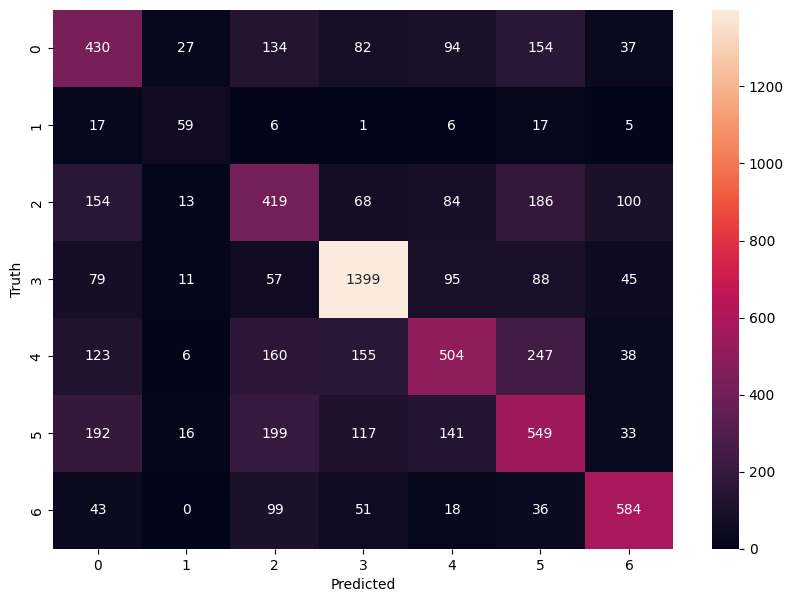

In [ ]:
# prompt: plot confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [ ]:
img = cv2.imread('/content/img_angry.jpeg')

In [ ]:
img.shape

(1300, 1300, 3)

In [ ]:
# prompt: reshape image

import numpy as np
img_resized = cv2.resize(img, (48, 48))
img_array = np.expand_dims(img_resized, axis=0)


In [ ]:
img_array

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [241, 241, 241],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [248, 248, 248],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

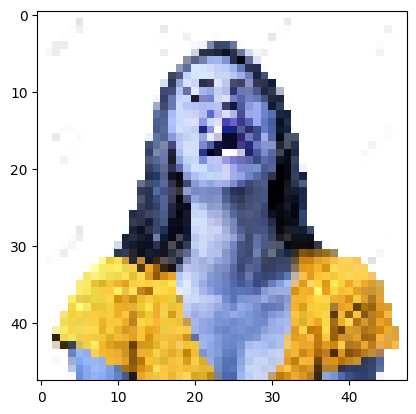

In [ ]:
plt.imshow(img_resized)

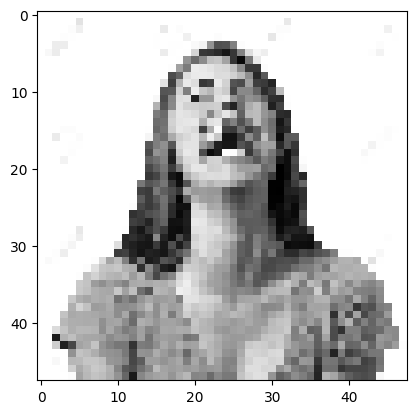

In [ ]:
# prompt: convert image to grayshade

import matplotlib.pyplot as plt
img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')


In [ ]:
img_array = np.expand_dims(img_gray, axis=0)

In [ ]:
img_array/255.

array([[[1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 0.94509804,
         1.        , 1.        ],
        ...,
        [1.        , 1.        , 0.97254902, ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ]]])

In [ ]:
# prompt: convert img  to required form

import numpy as np
img_array = np.expand_dims(img_resized, axis=0)
img_array = img_array.astype(np.float32) / 255.0  # Normalize pixel values


In [ ]:
img_resized = cv2.resize(img, (48, 48))

In [ ]:
x=model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
classes=["angry","disgusted","fearful","happy","neutral","sad","surprised"]
classes[np.argmax(x)]

'angry'

In [ ]:
# prompt: save model

model.save('my_model.h5')


In [ ]:
from

NameError: name 'keras' is not defined

In [ ]:
# prompt: import model

from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('my_model.h5')
